In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores_full

from transformers import AutoModelForCausalLM

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../../_data/fig-symmetry-vision-models/full-models/GIT-text-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [4]:
path = ["git.encoder.layer[", "].attention.self.query.weight", "].attention.self.key.weight"]

'GIT base (l = 6, d = 768, h = 12 ; 129M parameters)'
dh = 64
l = 6
d = 768
h = d // dh
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")
score_List= get_scores_full(d, l, h, dh, model, path)
models['GIT-text-base'] = [l, d, h, dh, score_List]

'GIT large (l = 6, d = 1768, h = 12 ; 340M parameters)'
dh = 64
l = 6
d = 768
h = d // dh
model = AutoModelForCausalLM.from_pretrained("microsoft/git-large")
score_List= get_scores_full(d, l, h, dh, model, path)
models['GIT-text-large'] = [l, d, h, dh, score_List]

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [5]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

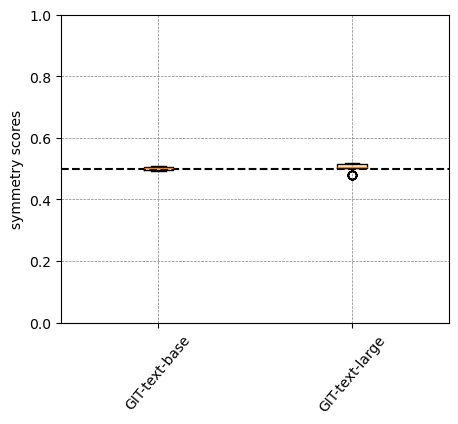

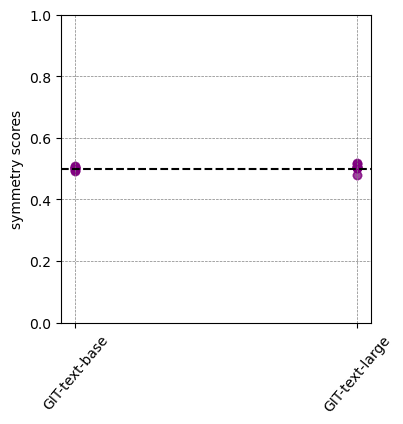

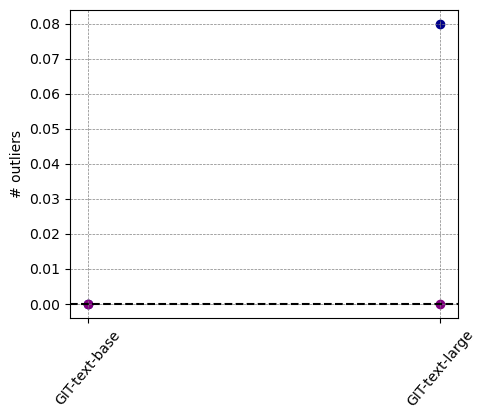

In [6]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)